In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.5MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 3.8MB 33.3MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [12]:
import pandas as pd
import konlpy
from konlpy.tag import Komoran
from pprint import pprint
from collections import defaultdict
from collections import Counter
komoran=Komoran()
#print(konlpy.__version__)



##사용자 사전 추가하기
komoran_userdic=Komoran(userdic='./userdicCanSur.txt')
# 형태소분석 결과 보기 komoran.pos(sent)
Data=pd.read_csv('/content/drive/My Drive/통합.csv', engine='python', encoding='CP949')
corpus=Data['title']
SW = [".co",".kr","기자","뉴스",". co", ". com", ".com",
      "채널","구독","네이버","대상", "무단", "전재", "재배포","금지"]



import nltk #nltk라이브러리를 활용하면 토큰데이터를 살펴볼 수 있다고 함 
total_tokens=[token for msg in corpus for token in str(msg).split()]
print(len(total_tokens)) #전체 토큰의 갯수 

text=nltk.Text(total_tokens, name='NMSC') 
#nltk.Text는 토큰데이터를 묶을수 있게 해주나봄
#NMSC는 텍스트객체에 붇이 이름이라고 니옴, <Text:NMSC>라고 나옴  
print(len(set(text.tokens))) #중복을제거한 토큰의 갯수 
print(text.vocab().most_common(10)) #가장 많이 나온 상위 10개의 토큰 
#print(text.vocab().most_common()[:-20:-1]) #하위10개의 토큰 구하기 

import re
def message_cleaning(docs):
    docs = [str(doc) for doc in docs] # series의 object를 str로 변경.
    #사진이나 이모티콘제거 
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 자음이나 모음만 존재하는 표현 제거, 예: ㅠㅠ, ㅋㅋㅋ
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*") 
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # http://로 시작하는 하이퍼링크 제거 
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 특수문제 제거 
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def text_tokenizing(doc):
    # morph만 
    # return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    return [word for word in komoran_userdic.nouns(doc) if word not in SW and len(word) > 1]


cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
#print(cleaned_corpus[:2])

#cleaned_corpus는 현재 list형임
cleaned_text = pd.Series(cleaned_corpus) #대괄호안에 ''와 ,로 구분되어 있던 각 글을 pd.series로 바꾼?
cleaned_data = cleaned_text[cleaned_text != ""] #빈칸이 없는 값을 cleaned_data로 저장? 
#cleaned_data.info() #이건 에러나는데 cleaned_data가 시리즈형이라 그런듯
#cleaned_data.head()


import pickle #피클모듈을 활용해 객체자체를 바이너리로 저장하게 
with open("./cleaned_data.pk", "wb") as f: #cleaned_data파일을 피클로 저장?
    pickle.dump(cleaned_data, f) #피클.덤프(객체, 파일)로 저장하는거임 

#!pip install tqdm
from tqdm import tqdm_notebook # progress bar
#from konlpy.tag import Mecab #Mecab, Okt 등 형태소 분석기 불러오기,앞에서 코모란불러옴 
import numpy as np
import string # 특수문자
import warnings # 경고 알림 제거
from gensim import corpora
from gensim import models
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning) # 경고 알림이 뜨면 모두 무시합니다.

def read_documents(input_file_name):
    """문서들을 주어진 이름의 파일로부터 읽어들여 돌려준다."""
    corpus = []
    with open(input_file_name, 'rb') as f:
        temp_corpus = pickle.load(f)
    for page in temp_corpus:
        corpus += page
    return corpus

def text_cleaning(docs): # 한글만 남기는 함수 
    for doc in docs:
        doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    return docs

def text_tokenizing(corpus, tokenizer):
    token_corpus = []
    if tokenizer == "noun":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = komoran_userdic.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)
            
    elif tokenized == "morph":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = komoran_userdic.nouns(corpus[n])
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)

    elif tokenizer == "word":
        for n in tqdm_notebook(range(len(corpus)), desc="Preprocessing"):
            token_text = corpus[n].split()
            token_text = [word for word in token_text if word not in SW and len(word) > 1]
            token_corpus.append(token_text)
        
    return token_corpus


documents = corpus
#SW = define_stopwords("./stopwords-ko.txt")
cleaned_text = text_cleaning(documents)
tokenized_text = text_tokenizing(cleaned_text, tokenizer="noun") #tokenizer= "noun" or "word"

#print(tokenized_text[11])


def flatten(l):
    flatList=[]
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

34014
11295
[('코스피', 1373), ('코스피,', 1185), ('상승', 546), ('마감', 359), ('오른', 283), ('하락', 276), ('돌파', 269), ('출발', 259), ('장중', 204), ('연고점', 183)]
5409


In [13]:
cleaned_nouns=flatten(tokenized_text) #모두 토크나이징된 단어를 flatten하게 
#즉, flatten전에는 각 문장이 []로 또 []안에 있었는데, 플래튼하면 하나의 []로 되었음 
cleaned_nouns=[x for x in cleaned_nouns if len(x)>1] #한글자단어 초과
cleaned_nouns=[x for x in cleaned_nouns if not x in SW] #stop_words에 없는 단어
cleaned_nouns=[x for x in cleaned_nouns if not x.isdigit()] #숫자가 아닌단어 
# 상위 60개 단어 frequency 뽑기 
pd.Series(cleaned_nouns).value_counts().head(60) #상위60개 보여주기 

코스      3620
마감      1017
상승       925
출발       522
코스닥      519
돌파       488
하락       463
코로나      429
증시       360
기관       345
매수       307
개인       294
급등       257
달러       253
거래       247
연고       231
회복       228
외국인      228
개월       204
환율       199
개미       196
개장       189
경신       187
연속       179
매도       170
확산       165
강세       149
급락       145
투자       144
상승세      142
최고       138
종목       136
시장       135
포인트      134
공매도      131
오전       125
우려       125
주식       120
바이오      119
동학       117
사자       109
실적       101
주가       100
상반기       98
외인        95
종합        95
상위        93
삼성전자      93
포토        91
경제        85
매수세       85
상장        81
동반        81
반등        81
오늘        81
증권        79
소폭        79
갈등        77
랠리        77
분기        74
dtype: int64

In [6]:
!pip install wordcloud

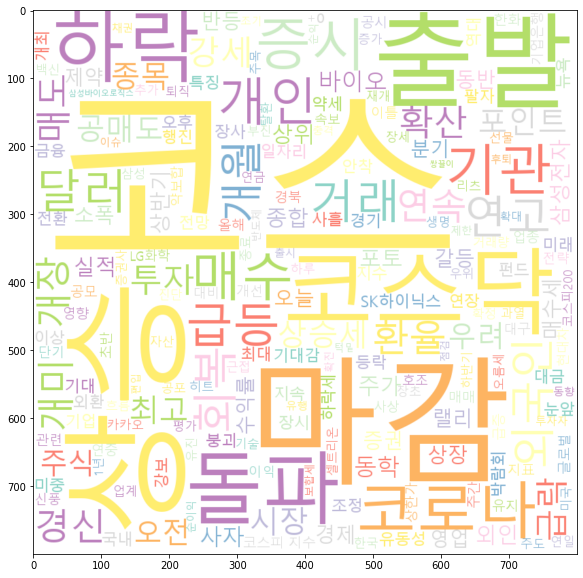

In [14]:
#!pip install wordcloud
from wordcloud import WordCloud
def __array__(self):
    """Convert to numpy array.
    Returns 
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()
def to_array(self):
    return np.array(self.to_image())
font_path = '/content/drive/My Drive/malgun.ttf'
#리눅스용 font_path="/Library/Fonts/AppleGothic.ttf"
wordcloud=WordCloud(font_path=font_path, width=800, height=800, 
                    background_color="white", colormap="Set3")
wordcloud=wordcloud.generate_from_frequencies(Counter(cleaned_nouns))
array=wordcloud.to_array()
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [16]:
#!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=14eaa626522f48b18e0765e17296ba9b72304d1b35fd8d75258f41fa89f9b22f
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [17]:
dictionary = corpora.Dictionary(tokenized_text)
# 문서-단어 행렬(document-term matrix) 생성
corpus = [dictionary.doc2bow(text) for text in tokenized_text]


import time
import numpy as np
import json
import warnings
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
coherences=[]
perplexities=[]
passes=[]
warnings.filterwarnings('ignore')

from gensim.models.word2vec import Word2Vec
embedding_model = Word2Vec(tokenized_text, size=100, window = 5, 
                           min_count=50, workers=4, iter=100, sg=1)
#포스태깅된 컨텐츠를 100차원의 벡터로 바꾸고, 주변 단어(window)는 앞뒤로 5개까지 보되, 
#코퍼스 내 출현 빈도가 50번 미만인 단어는 분석에서 제외해라. CPU는 쿼드코어를 쓰고 100번 반복 학습해라. 
#분석방법론은 CBOW와 Skip-Gram 중 후자를 선택해라

In [20]:
print(embedding_model.most_similar(positive=["코스"], topn=20))

[('매수', 0.35093873739242554), ('국내', 0.2988010048866272), ('외국인', 0.28871047496795654), ('출발', 0.28287947177886963), ('상승', 0.28131774067878723), ('코스닥', 0.27977728843688965), ('증시', 0.2599712312221527), ('삼성전자', 0.25887519121170044), ('개장', 0.2583966851234436), ('하락', 0.2575516104698181), ('안착', 0.25552788376808167), ('매도', 0.2486007809638977), ('회복', 0.24853883683681488), ('달러', 0.24838204681873322), ('강보', 0.24739710986614227), ('연속', 0.24435190856456757), ('SK하이닉스', 0.24235939979553223), ('기관', 0.2388085126876831), ('개인', 0.23853224515914917), ('종합', 0.23148757219314575)]


** degree **
('코스', 0.7586206896551724)
('마감', 0.22413793103448276)
('상승', 0.21264367816091953)
('코스닥', 0.14942528735632182)
('출발', 0.13793103448275862)
('돌파', 0.13793103448275862)
('하락', 0.12643678160919541)
('기관', 0.11494252873563218)
('코로나', 0.11494252873563218)
('매수', 0.10919540229885058)
('거래', 0.10344827586206896)
('증시', 0.10344827586206896)
('개인', 0.09770114942528735)
('연고', 0.08045977011494253)
('급등', 0.08045977011494253)
('외국인', 0.07471264367816091)
('경신', 0.06321839080459771)
('회복', 0.05747126436781609)
('매도', 0.05747126436781609)
('우려', 0.05747126436781609)
** betweenness **
('코스', 0.7360565827029849)
('수익률', 0.0518237990831174)
('코로나', 0.050336894481801786)
('바이오', 0.03162580559431267)
('마감', 0.028517691124826855)
('상승', 0.026667653690775076)
('거래', 0.02349419860880893)
('공매도', 0.02119460500963391)
('투자', 0.021139237702921178)
('증권', 0.02041946271565566)
('영업', 0.015812902797156334)
('장사', 0.010630522888844595)
('상장', 0.010630522888844595)
('최대', 0.010630522888844595)
('제약'

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


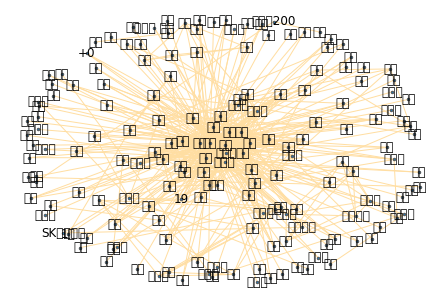

In [21]:
#########잡아라 텍스트 마이닝 with파이선 책 129p
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer("[\w]+")

#아래 stop_words를 수정해가면서 진행 

count={}
for line in Data['title']:
    #words=line.lower()
    tokens=komoran_userdic.nouns(line) #komoran_userdic.nouns대신에 tokenizer.tokenize였음 
    stopped_tokens=[i for i in list(set(tokens)) if not i in SW+["br"]]
    stopped_tokens2=[i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b, a]=count.get((b, a),0)+1
            else :
                count[a, b]=count.get((a, b),0)+1
df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])


df2=pd.DataFrame(list1,columns=["term1","term2","freq"])
df3=df2.sort_values(by=["freq"],ascending=False)
df3_pos=df3.reset_index(drop=True)
df3_pos.head()



import networkx as nx
import operator

import numpy as np
G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>15)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])

print("** closeness **")
for x in range(20):
    print(sorted_cls[x])

print("** eigenvector **")
for x in range(20):
    print(sorted_egv[x])

G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

for i in range((len(np.where(df3_pos['freq']>15)[0]))): #원래 15였는데 50으로 
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

# sizes = [G.node[node]['nodesize']*500 for node in G]



%matplotlib inline
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()

font_name = font_manager.FontProperties(fname=font_path).get_name()
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
    'font_family': font_name,
}

nx.draw(G, node_size=6, pos=nx.spring_layout(G, k=2.5, iterations=50), **options) ##node_size나 레이아웃, k 수정함
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

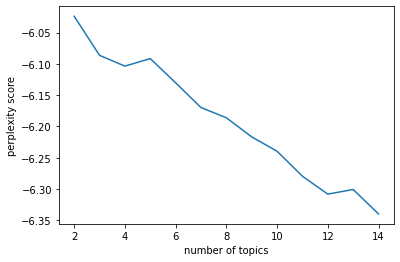

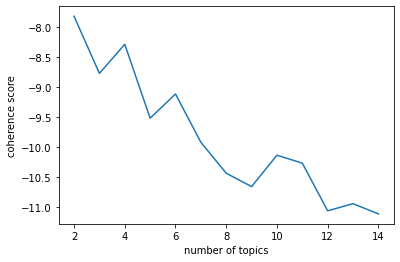

Building document-term matrix.

Printing topic words.

Topic ID: 0
	코스	0.1300853192806244
	마감	0.04349565878510475
	상승	0.02877584844827652
	코로나	0.022872520610690117
	기관	0.018410546705126762
	코스닥	0.017171096056699753
	거래	0.01703508570790291
	19	0.01679808460175991
	하락	0.016245467588305473
	돌파	0.0160824004560709
	급락	0.01572880521416664
	출발	0.014964942820370197
	개인	0.013877964578568935
	매수	0.01319273840636015
	외국인	0.013157359324395657
	확산	0.01256065908819437
	매도	0.011773800477385521
	연고	0.010592780075967312
	달러	0.009998723864555359
	연속	0.009438118897378445
	개미	0.009064572863280773
	우려	0.008968748152256012
	경신	0.008440500125288963
	증시	0.00781006645411253
	개월	0.0069566951133310795
	상승세	0.006811484228819609
	오전	0.006213254760950804
	환율	0.006106786895543337
	분기	0.0060503496788442135
	포인트	0.005731670651584864


Topic ID: 1
	코스	0.05873870104551315
	코로나	0.019872959703207016
	증시	0.018928129225969315
	하락	0.017440127208828926
	상승	0.017278574407100677
	코스닥	0.014526547864079475
	출발	0.01172064151614904

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.087284  0.0       1        1  53.801725
1     -0.087284  0.0       2        1  46.198275, topic_info=    Term         Freq        Total Category  logprob  loglift
1     기관   298.000000   298.000000  Default  30.0000  30.0000
5     코스  2832.000000  2832.000000  Default  29.0000  29.0000
8     마감   827.000000   827.000000  Default  28.0000  28.0000
91    거래   280.000000   280.000000  Default  27.0000  27.0000
411   급락   257.000000   257.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
8     마감   145.372861   827.851660   Topic2  -4.5292  -0.9673
83    달러    83.929800   240.817113   Topic2  -5.0785  -0.2818
298   확산    81.739272   278.825231   Topic2  -5.1049  -0.4548
85    환율    73.321043   169.141011   Topic2  -5.2136  -0.0637
135   돌파    71.008536   323.353192   Topic2  -5.2457  -0.7437

[154 rows x 6 columns], token_table=      Topic      Freq Term
term                      
7         1  0.916082   +0
7         2  0.098152   +0
249       1  0.930119  10원
249       2  0.066437  10원
174       1  0.897311   19
...     ...       ...  ...
85        2  0.431593   환율
81        1  0.377697   회복
81        2  0.623639   회복
245       1  0.973122   흑자
245       2  0.074856   흑자

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [22]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,15):
    model = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, alpha="auto", eta="auto", random_state=99)
    perplexity_values.append(model.log_perplexity(corpus))

x=range(2,15)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()


import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=i, iterations=400)
    #ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    #ldamodel = models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, random_state=99)
    #coherence_model_lda=CoherenceModel(model=ldamodel, texts=corpus, dictionary=dictionary, topn=10)
    coherence_model_lda=CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)
    
x=range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()


# 위의 결과를 바탕으로 토픽 개수, 키워드 개수를 정해주는 변수를 추가.
NUM_TOPICS = 2
NUM_TOPIC_WORDS = 30

def build_doc_term_mat(documents):
    # 문서-단어 행렬 만들어주는 함수.
    print("Building document-term matrix.")
    dictionary = corpora.Dictionary(documents)
    corpus = [dictionary.doc2bow(document) for document in documents]
    return corpus, dictionary

def print_topic_words(model):
    # 토픽 모델링 결과를 출력해 주는 함수.
    print("\nPrinting topic words.\n")
    for topic_id in range(model.num_topics):
        topic_word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        for topic_word, prob in topic_word_probs:
            print("\t{}\t{}".format(topic_word, prob))
        print("\n")

# document-term matrix를 만들고,
corpus, dictionary = build_doc_term_mat(tokenized_text)
# LDA를 실행.
model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, 
                                 id2word=dictionary, alpha="auto", eta="auto", random_state=99)
# 결과를 출력.
print_topic_words(model)
print(model.log_perplexity(corpus))


# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()

# pyLDAvis 실행.
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
data